In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
## This file downloaded from COSMIC: https://cancer.sanger.ac.uk/cosmic/download/cosmic/v100/genomescreensmutanttsv
## Log in an filter by "Large Intestine"
mutationdata = pd.read_csv("/Users/davidshorthouse/Documents/Data/COSMIC/Large_intestine_COSMIC_mutations.csv")

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_12741/3224344362.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mutationdata = pd.read_csv("/Users/davidshorthouse/Documents/Data/COSMIC/Large_intestine_COSMIC_mutations.csv")


In [3]:
mutationdata.head()

,Unnamed: 0,GENE_SYMBOL,COSMIC_GENE_ID,TRANSCRIPT_ACCESSION,COSMIC_SAMPLE_ID,SAMPLE_NAME,COSMIC_PHENOTYPE_ID,GENOMIC_MUTATION_ID,LEGACY_MUTATION_ID,MUTATION_ID,...,GENOME_STOP,STRAND,PUBMED_PMID,COSMIC_STUDY_ID,HGVSP,HGVSC,HGVSG,GENOMIC_WT_ALLELE,GENOMIC_MUT_ALLELE,MUTATION_SOMATIC_STATUS
0,14,PGAM5,COSG3464,ENST00000454808.2,COSS2607147,HUB-02-B2-070,COSO28864826,COSV58203115,COSM6040759,61070074,...,133295382.0,+,NaN,COSU670,NaN,ENST00000454808.2:c.272+676C>T,12:g.133295382C>T,C,T,Confirmed somatic variant
1,31,PTPN1,COSG8144,ENST00000371621.3,COSS1651176,TCGA-AZ-6603-01,COSO28694826,COSV50403403,COSM1412424,38682688,...,49197963.0,+,NaN,COSU376,ENSP00000360683.3:p.Thr417Met,ENST00000371621.3:c.1250C>T,20:g.49197963C>T,C,T,Confirmed somatic variant
2,43,ATXN2L,COSG46295,ENST00000395547.2,COSS1651197,TCGA-CK-5913-01,COSO28454826,COSV100294844,COSM7605644,47064055,...,28847651.0,+,NaN,COSU376,ENSP00000378917.2:p.Cys1048=,ENST00000395547.2:c.3144T>C,16:g.28847651T>C,T,C,Confirmed somatic variant
3,51,ARHGEF10,COSG21039,ENST00000518288.1,COSS2506609,sysucc-1422T,COSO28864826,COSV50643338,COSN20458451,78787872,...,1807346.0,+,NaN,COSU646,NaN,ENST00000518288.1:c.266-717C>G,8:g.1807346C>G,C,G,Confirmed somatic variant
4,68,LINGO2,COSG51151,ENST00000308675.3,COSS2658290,T3319,COSO28864826,COSV58058127,COSM6701436,26721300,...,27950274.0,-,27149842.0,NaN,ENSP00000310126.3:p.Thr132=,ENST00000308675.3:c.396T>C,9:g.27950274A>G,A,G,Confirmed somatic variant


In [4]:
## Drop duplicates

allsamples = mutationdata["COSMIC_SAMPLE_ID"].nunique()
mutationdata = mutationdata.drop_duplicates(subset = ["SAMPLE_NAME", "MUTATION_ID"])

In [5]:
## Define which genes we want
WNTlist = ["WNT1", "WNT2", "WNT2B", "WNT3", "WNT3A", "WNT4", "WNT5A", "WNT5B", "WNT6", "WNT7A", "WNT7B"
           ,"WNT8A", "WNT8B", "WNT9A", "WNT9B", "WNT10A", "WNT10B", "WNT11", "WNT16"]

In [6]:
## Subset to WNT genes and missense variants
WNT_mutations = mutationdata[mutationdata["GENE_SYMBOL"].isin(WNTlist)]
WNT_mutations = WNT_mutations[WNT_mutations["MUTATION_DESCRIPTION"] == "missense_variant"]

In [8]:
## Get residues with mutations
WNT_mutations = mutationdata[mutationdata["GENE_SYMBOL"].isin(WNTlist)]
WNT_mutations = WNT_mutations[WNT_mutations["MUTATION_DESCRIPTION"] == "missense_variant"]
WNT_mutations["MUTATION_RESIDUE"] = WNT_mutations["MUTATION_AA"].str[3:-1]

WNT_mutations["MUTATION_RESIDUE"] = WNT_mutations["MUTATION_RESIDUE"].astype(int)

## Performing mutation calculation using alignment performed using MUSCLE

In [9]:
alignmentfile  = ("./AllWNTS_muscle.fa")

In [10]:
from Bio import AlignIO

In [11]:
alignment = AlignIO.read(alignmentfile, "fasta")

In [21]:
## Finger domain

In [13]:
## We get the sequences at a particlar location and define where they start in each gene
WNTdata = []

for wnt in WNTlist:
    sequenceid = wnt + "_HUMAN"
    for sequence in alignment:
        alignmentname = (sequence.id.split("|")[2].split("/")[0])
        if sequenceid == alignmentname:
            #print(sequenceid)
            print(sequence.seq[312:325])
            sequence_prefinger = sequence.seq[:312]
            starting_residue = len(sequence_prefinger.ungap("-"))
            WNTdata.append((wnt, starting_residue))
        else:
            continue

CKCHGMSGSCTVR
CKCHGVSGSCTLR
CKCHGVSGSCTLR
CKCHGLSGSCEVK
CKCHGLSGSCEVK
CKCHGVSGSCEVK
CKCHGVSGSCSLK
CKCHGVSGSCSLK
CKCHGLSGSCALR
CKCHGVSGSCTTK
CKCHGVSGSCTTK
CKCHGISGSCSIQ
CKCHGVSGSCTTQ
CKCHGVSGSCTVR
CKCHGVSGSCAVR
CKCHGVSGSCSIR
CRCHGVSGSCAVK


In [14]:
WNTdata

[('WNT1', 217),
 ('WNT2', 205),
 ('WNT2B', 236),
 ('WNT3', 205),
 ('WNT3A', 202),
 ('WNT4', 205),
 ('WNT5A', 237),
 ('WNT5B', 216),
 ('WNT6', 221),
 ('WNT7A', 199),
 ('WNT7B', 199),
 ('WNT8A', 179),
 ('WNT8B', 179),
 ('WNT9A', 214),
 ('WNT9B', 209),
 ('WNT11', 208),
 ('WNT16', 220)]

In [16]:
## We collect the mutations at each position
mutationcounts = []

for wnt in WNTdata:
    wntname = wnt[0]
    wntfingerstart = wnt[1]
    mutations = WNT_mutations[WNT_mutations["GENE_SYMBOL"] == wntname]
    mutations = mutations[mutations["MUTATION_RESIDUE"].between(wntfingerstart, wntfingerstart + 16)]

    mutationlist = mutations["MUTATION_RESIDUE"].tolist()
    mutationcounts.append([item - wntfingerstart for item in mutationlist])

In [19]:
mutationcounts_flat = [item for row in mutationcounts for item in row]

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_12741/4017575238.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels([0,2,4,6,8,10,12], size = 16)


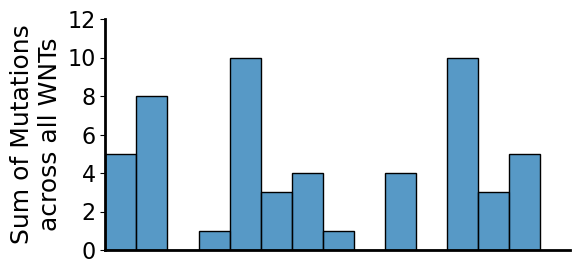

In [20]:
## We plot the cumulative frequency
fig=plt.figure(figsize=(6,3), dpi= 100, facecolor='w', edgecolor='k')

g = sns.histplot(mutationcounts_flat, bins = 14)
g.set_xlim(0,17.1)
g.set_ylim(0,12)
g.set_ylabel("Sum of Mutations\nacross all WNTs", size = 18)
g.set_yticklabels([0,2,4,6,8,10,12], size = 16)
g.set_xticks([])
sns.despine()

g.spines['left'].set_linewidth(2)
g.spines['bottom'].set_linewidth(2)

plt.savefig("Finger_plot_frequency.pdf", bbox_inches = "tight")

In [22]:
## Thumb domain

In [23]:
WNTdata = []

for wnt in WNTlist:
    sequenceid = wnt + "_HUMAN"
    for sequence in alignment:
        alignmentname = (sequence.id.split("|")[2].split("/")[0])
        if sequenceid == alignmentname:
            #print(sequenceid)
            print(sequence.seq[455:472])
            sequence_prefinger = sequence.seq[:454]
            starting_residue = len(sequence_prefinger.ungap("-"))
            WNTdata.append((wnt, starting_residue))
        else:
            continue

ERCNCTFHWCCHVSCRN
TKCGCKFHWCCAVRCQD
TQCECKFHWCCAVRCKE
EKCHCIFHWCCYVSCQE
EKCRCVFHWCCYVSCQE
ERCSCKFHWCCFVKCRQ
ERCHCKFHWCCYVKCKK
ERCHCKFHWCCFVRCKK
ENCLCRFHWCCVVQCHR
WQCNCKFHWCCYVKCNT
WQCNCKFHWCCFVKCNT
SSCNCKFQWCCTVKCDQ
SSCNCKFHWCCAVRCEQ
RPCQCQVRWCCYVECRQ
FSCHCQVQWCCYVECQQ
ERCHCKYHWCCYVTCRR
ERCECKFIWCCYVRCRR


In [24]:
mutationcounts = []

for wnt in WNTdata:
    wntname = wnt[0]
    wntfingerstart = wnt[1]
    mutations = WNT_mutations[WNT_mutations["GENE_SYMBOL"] == wntname]
    mutations = mutations[mutations["MUTATION_RESIDUE"].between(wntfingerstart +1, wntfingerstart + 17)]

    mutationlist = mutations["MUTATION_RESIDUE"].tolist()
    mutationcounts.append([item - wntfingerstart for item in mutationlist])

In [25]:
mutationcounts_flat = [item for row in mutationcounts for item in row]

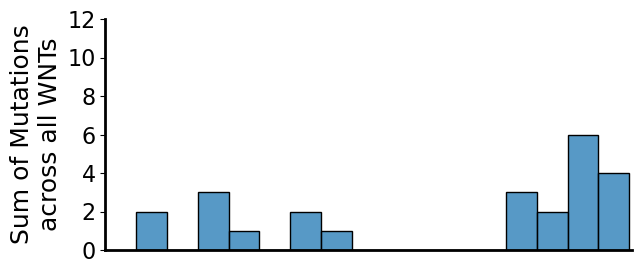

In [26]:
fig=plt.figure(figsize=(6.8,3), dpi= 100, facecolor='w', edgecolor='k')

g = sns.histplot(mutationcounts_flat, bins = 16)
g.set_xlim(0,17.1)
g.set_ylabel("Sum of Mutations\nacross all WNTs", size = 18)
g.set_ylim(0,12)
g.set_yticks([0,2,4,6,8,10,12])
g.set_yticklabels([0,2,4,6,8,10, 12], size = 16)
g.set_xticks([])
sns.despine()

g.spines['left'].set_linewidth(2)
g.spines['bottom'].set_linewidth(2)

plt.savefig("Thumb_plot_frequency.pdf", bbox_inches = "tight")